iter = 0 energy =  -0.09459041005073131
iter = 1 energy =  -0.17099036405404242
iter = 2 energy =  -0.2337104300464947
iter = 3 energy =  -0.28610571588502226
iter = 4 energy =  -0.3305674278580122
iter = 5 energy =  -0.3687942230488602
iter = 6 energy =  -0.40200607831589386
iter = 7 energy =  -0.43109378931026887
iter = 8 energy =  -0.4567200504052963
iter = 9 energy =  -0.47938755398565924
iter = 10 energy =  -0.4994852890649972
iter = 11 energy =  -0.5173204872092527
iter = 12 energy =  -0.5331410438931969
iter = 13 energy =  -0.547151530689401
iter = 14 energy =  -0.5595248216000375
iter = 15 energy =  -0.5704106640385551
iter = 16 energy =  -0.579942083223782
iter = 17 energy =  -0.5882402240046575
iter = 18 energy =  -0.5954180479505154
iter = 19 energy =  -0.6015831798161788
iter = 20 energy =  -0.6068825021732902
iter = 21 energy =  -0.611429032179379
iter = 22 energy =  -0.6153255521700927
iter = 23 energy =  -0.6186624339925614
iter = 24 energy =  -0.6215184847420288
iter = 

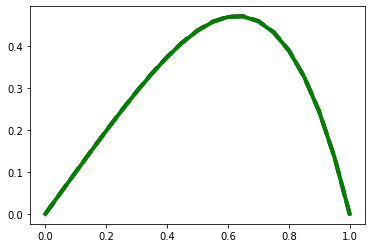

In [5]:
import math, sys
import numpy as np
from scipy.sparse import spdiags, linalg
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy.fftpack import fft, ifft

## Lattice ##

Np    =  21    #len(num_str)   # z-axis points
L     =  1.0
R     =  np.linspace(0, L, num=Np)
a     =  R[1] - R[0] # Ang
funct =  12.0*R**2
exact =  R*(1.0-R**3)

phi = np.zeros(Np)

## Relaxation ##

omega = 1.5
H = 1./(Np-1)
Ebefore = 0.
E = 0.
for j in range(401):
    for i in range(1, Np-1):
        phip = (phi[i-1] + phi[i+1] + (H**2)*funct[i])/2.0
        phi[i] = (1.0-omega)*phi[i] + omega*phip
    Ebefore = E
    E = 0.
    for k in range(1, Np):
        E = E + ((((phi[k]-phi[k-1]))/H)**2)/2.
        E = E -(H**2)*funct[k]*phi[k] / (H**2)
    E = E*H
    
    if np.sqrt((Ebefore - E)**2) > 1e-6:
        print('iter =', j, 'energy = ', E)
        
        
## Visualization ##

plt.plot(R, exact, color='black', linestyle='--', linewidth=4)
plt.plot(R, phi, color='green', linewidth=4)
plt.show()